In [1]:
#import Pkg; Pkg.rm("RigorousInvariantMeasures")

In [2]:
#Pkg.add(path = "/home/isaia/Coding/RigorousInvariantMeasures.jl/")

In [3]:
abs(0.9*exp(2*pi*im/4))

ErrorException: syntax: "abs((0.9 * exp((*(2, pi, im) / 4))))" is not a valid function argument name around /home/isaia/Dropbox/Lavoro/Collaborators/Blumenthal-Nisoli-Taylor-Crush/DraftPseudospectra/current/Julia_notebooks/Blaschke.ipynb:1

In [3]:
using IntervalArithmetic

In [4]:
r = 0.9
ϕ = Interval(π)/4

[0.785398, 0.785399]

In [5]:
B(z; μ = r*exp(im*ϕ)) = (z*(μ-z))/(1-μ'*z)

B (generic function with 1 method)

In [97]:
N = 512

interval_angle = [interval(i,i+1)/N for i in 0:N-1]

r_min = 7/8
r_min_image = [B(r_min*exp(2*pi*im*θ)) for θ in interval_angle]

512-element Vector{Complex{Interval{Float64}}}:
   [0.190776, 0.226777] + [0.747034, 0.791551]im
   [0.174265, 0.210562] + [0.748513, 0.794396]im
   [0.157582, 0.194145] + [0.749597, 0.796859]im
    [0.140732, 0.17753] + [0.750273, 0.798926]im
   [0.123719, 0.160719] + [0.750528, 0.800582]im
   [0.106548, 0.143718] + [0.750348, 0.801809]im
  [0.0892254, 0.126531] + [0.749717, 0.802594]im
  [0.0717573, 0.109162] + [0.748622, 0.802917]im
  [0.054151, 0.0916186] + [0.747046, 0.802761]im
 [0.0364145, 0.0739076] + [0.744973, 0.802107]im
                        ⋮
   [0.326495, 0.368254] + [0.713133, 0.755706]im
   [0.312216, 0.353367] + [0.718135, 0.760935]im
   [0.297743, 0.338261] + [0.722858, 0.765866]im
   [0.283077, 0.322939] + [0.727293, 0.770489]im
   [0.268218, 0.307401] + [0.731431, 0.774794]im
    [0.253169, 0.29165] + [0.735261, 0.778769]im
   [0.237931, 0.275687] + [0.738774, 0.782405]im
   [0.222506, 0.259515] + [0.741959, 0.78569]im
   [0.206896, 0.243135] + [0.744803, 0.788611

In [91]:
abs_r_image_min = r_min-maximum(abs.(r_min_image)).lo

0.02068092641725662

In [92]:
using Plots

r_min_image_x = [mid(real(x)) for x in r_min_image]
r_min_image_y = [mid(imag(x)) for x in r_min_image]

@info r_min, maximum([abs(x).hi for x in r_min_image])

┌ Info: (0.125, 0.10599645323407972)
└ @ Main /home/isaia/Dropbox/Lavoro/Collaborators/Blumenthal-Nisoli-Taylor-Crush/DraftPseudospectra/current/Julia_notebooks/Blaschke.ipynb:6


In [95]:
r_max = 2

r_max_image = [B(r_max*exp(2*pi*im*θ)) for θ in interval_angle]

r_max_image_x = [mid(real(x)) for x in r_max_image]
r_max_image_y = [mid(imag(x)) for x in r_max_image]

@info r_max, minimum([abs(x).lo for x in r_max_image])

abs_r_image_max = minimum(abs.(r_max_image)).lo-r_max

┌ Info: (2, 2.106441536271575)
└ @ Main /home/isaia/Dropbox/Lavoro/Collaborators/Blumenthal-Nisoli-Taylor-Crush/DraftPseudospectra/current/Julia_notebooks/Blaschke.ipynb:8


0.10644153627157493

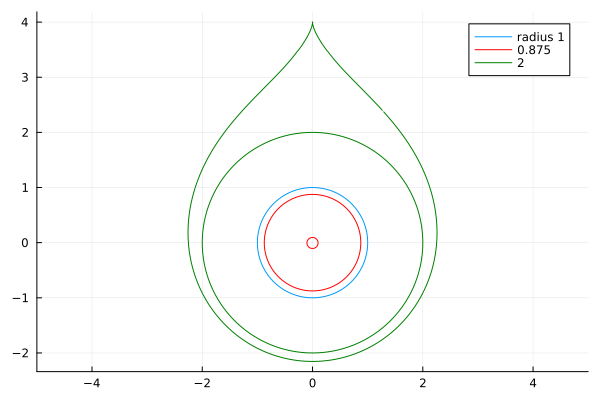

In [98]:
circle_x = [cos(θ) for θ in 0:0.01:2π]
circle_y = [sin(θ) for θ in 0:0.01:2π]


r_min_circle_x = [r_min*cos(θ) for θ in 0:0.01:2π]
r_min_circle_y = [r_min*sin(θ) for θ in 0:0.01:2π]

r_max_circle_x = [r_max*cos(θ) for θ in 0:0.01:2π]
r_max_circle_y = [r_max*sin(θ) for θ in 0:0.01:2π]


plot(circle_x, circle_y, label = "radius 1", aspect_ratio = :equal)
plot!(r_min_circle_x, r_min_circle_y, color = :red, label = "$r_min")
plot!(r_min_image_x, r_min_image_y, color = :red, label = "")

plot!(r_max_circle_x, r_max_circle_y, color = :green, label = "$r_max")
plot!(r_max_image_x, r_max_image_y, color = :green, label = "")

In [12]:
maximum(radius_image)

0.7804831644210262

In [24]:
r = 1.0000001

radius_image_lo = [abs(B(r*exp(2*pi*im*θ))).lo for θ in 0:0.01:2π]

629-element Vector{Float64}:
 1.000000099999964
 1.0000000999999576
 1.0000000999999499
 1.0000000999999399
 1.0000000999999257
 1.0000000999999057
 1.0000000999998755
 1.0000000999998278
 1.0000000999997447
 1.0000000999995806
 ⋮
 1.0000000999999057
 1.0000000999999255
 1.0000000999999399
 1.00000009999995
 1.0000000999999574
 1.0000000999999636
 1.0000000999999683
 1.000000099999972
 1.0000000999999754

In [25]:
minimum(radius_image_lo)

1.0000000999797152

In [7]:
T(x) = angle(B(exp(2π*im*x)))/(2*pi)+0.5

T (generic function with 1 method)

In [8]:
import Pkg; Pkg.activate(".")
using Plots

  Activating project at `~/Dropbox/Lavoro/Collaborators/Blumenthal-Nisoli-Taylor-Crush/DraftPseudospectra/current/Julia_notebooks`


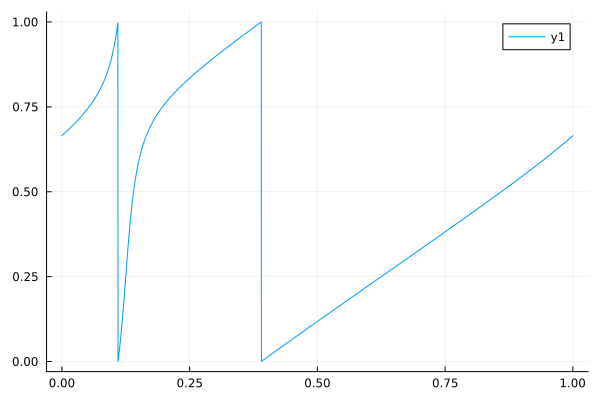

In [9]:
plot(x->mid(T(x)), 0, 1)

In [10]:
S(x) = mod(1.0+atan((sin(2*pi*x)-r*sin(ϕ))/(cos(2*pi*x)-r*cos(ϕ)))/pi, 1)

S (generic function with 1 method)

In [11]:
plot!(S, 0, 1)

ErrorException: mod not defined for Interval{Float64}

In [12]:
using RigorousInvariantMeasures

In [13]:
D(x) = 0.5+atan((RigorousInvariantMeasures.sinpi(2*x)-r*sin(ϕ))/(RigorousInvariantMeasures.cospi(2*x)-r*cos(ϕ)))/pi

D (generic function with 1 method)

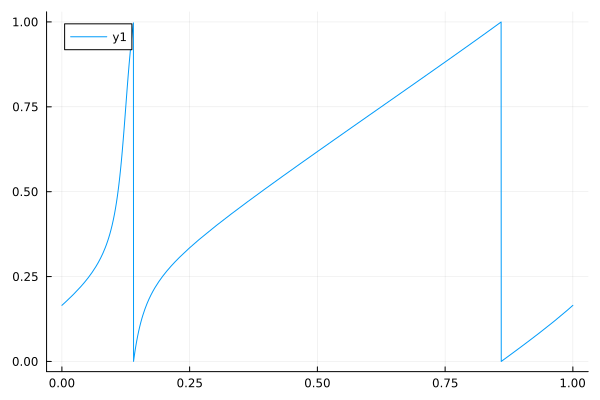

In [14]:
plot(x-> mid(D(Interval(x))), 0, 1)

In [15]:
using DualNumbers

In [16]:
Btheta(θ) = B(exp(2*pi*im*θ))
Bthetaprime(θ) = Btheta(Dual(θ, 1)).epsilon

Bthetaprime (generic function with 1 method)

In [17]:
Btheta(0.1)*Bthetaprime(0.1)'+Bthetaprime(0.1)*Btheta(0.1)'

[-2.15295e-12, 2.18137e-12] + [-2.224e-12, 2.224e-12]im

In [18]:
N(x) = real(x-(Btheta(x)-1.0)/Bthetaprime(x))

N (generic function with 1 method)

In [19]:
test(θ) = exp(2*pi*im*θ)
testprime(θ) = test(Dual(θ, 1)).epsilon

testprime (generic function with 1 method)

In [20]:
(test(0.0)*testprime(0.0)')'+test(0.0)*testprime(0.0)'

0.0 + 0.0im

In [21]:
x = rand(100)

for i in 1:10
    x = N.(x)
end

v = [z<0 ? z+1 : z for z in x]

a = v[1]
b = x[3]

a, b

([0.859787, 0.859788], [-0.140213, -0.140212])

In [22]:
D(0)

[0.16523, 0.165231]

In [23]:
Dyn = RigorousInvariantMeasures.PwMap([D, D, D], [0, a, b, 1], [D(0) 1; 0 1; 0 D(1)])

Piecewise-defined dynamic with 3 branches

In [24]:
Ban = RigorousInvariantMeasures.AnalyticFourierBasis.FourierAnalytic(128, 16384)

FFT on 16384 points restricted to highest frequency 128

In [43]:
Badj = RigorousInvariantMeasures.AdjointFourierBasis.FourierAdjoint(256, 32768)

FFT on 32768 points restricted to highest frequency 256

In [26]:
Pan = RigorousInvariantMeasures.AnalyticFourierBasis.Dual(Ban, Dyn; ϵ = 0.000000000000000001, max_iter = 100)

RigorousInvariantMeasures.AnalyticFourierBasis.FourierAnalyticDual(Interval[[0, 0], [0, -∞], [0, -∞], [0, -∞], [0, -∞], [0, -∞], [0, -∞], [0, -∞], [0, -∞], [0, -∞]  …  [∞, 1], [∞, 1], [∞, 1], [∞, 1], [∞, 1], [∞, 1], [∞, 1], [∞, 1], [∞, 1], [∞, 1]], [2708, 2709, 2710, 2711, 2712, 2713, 2714, 2715, 2716, 2717  …  2699, 2700, 2701, 2702, 2703, 2704, 2705, 2706, 2707, 2708], Interval[[1.35368, 1.35369], [-∞, ∞], [-∞, ∞], [-∞, ∞], [-∞, ∞], [-∞, ∞], [-∞, ∞], [-∞, ∞], [-∞, ∞], [-∞, ∞]  …  [-∞, ∞], [-∞, ∞], [-∞, ∞], [-∞, ∞], [-∞, ∞], [-∞, ∞], [-∞, ∞], [-∞, ∞], [-∞, ∞], [-∞, ∞]])

In [44]:
Padj = RigorousInvariantMeasures.AdjointFourierBasis.assemble_standard(Badj, Dyn; ϵ = 0.000000000000000001, max_iter = 100) 

┌ Info: 513
└ @ RigorousInvariantMeasures.AdjointFourierBasis /home/isaia/.julia/packages/RigorousInvariantMeasures/PY4TB/src/FourierAdjoint.jl:213
┌ Info: 256
└ @ RigorousInvariantMeasures.AdjointFourierBasis /home/isaia/.julia/packages/RigorousInvariantMeasures/PY4TB/src/FourierAdjoint.jl:217


┌ Info: Vector{Vector}
└ @ RigorousInvariantMeasures.AdjointFourierBasis /home/isaia/.julia/packages/RigorousInvariantMeasures/PY4TB/src/FourierAdjoint.jl:165


Progress:   1%|▍                                        |  ETA: 0:00:11

Progress:   2%|▊                                        |  ETA: 0:00:12

Progress:   3%|█▎                                       |  ETA: 0:00:12

Progress:   4%|█▌                                       |  ETA: 0:00:12

Progress:   5%|█▉                                       |  ETA: 0:00:12

Progress:   5%|██▎                                      |  ETA: 0:00:12

Progress:   6%|██▋                                      |  ETA: 0:00:12

Progress:   7%|███                                      |  ETA: 0:00:12

Progress:   8%|███▍                                     |  ETA: 0:00:11

Progress:   9%|███▋                                     |  ETA: 0:00:11

Progress:  10%|████                                     |  ETA: 0:00:11

Progress:  11%|████▍                                    |  ETA: 0:00:11

Progress:  11%|████▋                                    |  ETA: 0:00:11

Progress:  12%|█████                                    |  ETA: 0:00:11

Progress:  13%|█████▎                                   |  ETA: 0:00:11

Progress:  14%|█████▋                                   |  ETA: 0:00:11

Progress:  14%|█████▉                                   |  ETA: 0:00:11

Progress:  15%|██████▎                                  |  ETA: 0:00:11

Progress:  16%|██████▌                                  |  ETA: 0:00:11

Progress:  17%|██████▉                                  |  ETA: 0:00:11

Progress:  18%|███████▎                                 |  ETA: 0:00:11

Progress:  19%|███████▋                                 |  ETA: 0:00:11

Progress:  19%|████████                                 |  ETA: 0:00:10

Progress:  20%|████████▎                                |  ETA: 0:00:10

Progress:  21%|████████▋                                |  ETA: 0:00:10

Progress:  22%|█████████                                |  ETA: 0:00:10

Progress:  23%|█████████▍                               |  ETA: 0:00:10

Progress:  24%|█████████▋                               |  ETA: 0:00:10

Progress:  25%|██████████▏                              |  ETA: 0:00:10

Progress:  25%|██████████▍                              |  ETA: 0:00:10

Progress:  26%|██████████▊                              |  ETA: 0:00:10

Progress:  27%|███████████                              |  ETA: 0:00:10

Progress:  28%|███████████▍                             |  ETA: 0:00:09

Progress:  29%|███████████▊                             |  ETA: 0:00:09

Progress:  30%|████████████▏                            |  ETA: 0:00:09

Progress:  30%|████████████▌                            |  ETA: 0:00:09

Progress:  31%|████████████▉                            |  ETA: 0:00:09

Progress:  32%|█████████████▏                           |  ETA: 0:00:09

Progress:  33%|█████████████▋                           |  ETA: 0:00:09

Progress:  34%|██████████████                           |  ETA: 0:00:09

Progress:  35%|██████████████▍                          |  ETA: 0:00:08

Progress:  36%|██████████████▊                          |  ETA: 0:00:08

Progress:  37%|███████████████                          |  ETA: 0:00:08

Progress:  37%|███████████████▍                         |  ETA: 0:00:08

Progress:  38%|███████████████▋                         |  ETA: 0:00:08

Progress:  39%|████████████████                         |  ETA: 0:00:08

Progress:  40%|████████████████▎                        |  ETA: 0:00:08

Progress:  41%|████████████████▋                        |  ETA: 0:00:08

Progress:  41%|█████████████████                        |  ETA: 0:00:08

Progress:  42%|█████████████████▍                       |  ETA: 0:00:08

Progress:  43%|█████████████████▊                       |  ETA: 0:00:07

Progress:  44%|██████████████████                       |  ETA: 0:00:07

Progress:  45%|██████████████████▌                      |  ETA: 0:00:07

Progress:  46%|██████████████████▉                      |  ETA: 0:00:07

Progress:  47%|███████████████████▎                     |  ETA: 0:00:07

Progress:  48%|███████████████████▋                     |  ETA: 0:00:07

Progress:  49%|███████████████████▉                     |  ETA: 0:00:07

Progress:  49%|████████████████████▎                    |  ETA: 0:00:07

Progress:  50%|████████████████████▌                    |  ETA: 0:00:07

Progress:  51%|████████████████████▉                    |  ETA: 0:00:06

Progress:  52%|█████████████████████▎                   |  ETA: 0:00:06

Progress:  53%|█████████████████████▋                   |  ETA: 0:00:06

Progress:  54%|██████████████████████                   |  ETA: 0:00:06

Progress:  55%|██████████████████████▍                  |  ETA: 0:00:06

Progress:  55%|██████████████████████▊                  |  ETA: 0:00:06

Progress:  56%|███████████████████████                  |  ETA: 0:00:06

Progress:  57%|███████████████████████▍                 |  ETA: 0:00:06

Progress:  58%|███████████████████████▋                 |  ETA: 0:00:06

Progress:  58%|████████████████████████                 |  ETA: 0:00:05

Progress:  59%|████████████████████████▎                |  ETA: 0:00:05

Progress:  60%|████████████████████████▊                |  ETA: 0:00:05

Progress:  61%|█████████████████████████▏               |  ETA: 0:00:05

Progress:  62%|█████████████████████████▍               |  ETA: 0:00:05

Progress:  63%|█████████████████████████▊               |  ETA: 0:00:05

Progress:  64%|██████████████████████████               |  ETA: 0:00:05

Progress:  64%|██████████████████████████▍              |  ETA: 0:00:05

Progress:  65%|██████████████████████████▊              |  ETA: 0:00:05

Progress:  66%|███████████████████████████▏             |  ETA: 0:00:04

Progress:  67%|███████████████████████████▍             |  ETA: 0:00:04

Progress:  68%|███████████████████████████▉             |  ETA: 0:00:04

Progress:  69%|████████████████████████████▏            |  ETA: 0:00:04

Progress:  69%|████████████████████████████▌            |  ETA: 0:00:04

Progress:  70%|████████████████████████████▉            |  ETA: 0:00:04

Progress:  71%|█████████████████████████████▎           |  ETA: 0:00:04

Progress:  72%|█████████████████████████████▋           |  ETA: 0:00:04

Progress:  73%|█████████████████████████████▉           |  ETA: 0:00:04

Progress:  74%|██████████████████████████████▎          |  ETA: 0:00:03

Progress:  74%|██████████████████████████████▌          |  ETA: 0:00:03

Progress:  75%|██████████████████████████████▉          |  ETA: 0:00:03

Progress:  76%|███████████████████████████████▎         |  ETA: 0:00:03

Progress:  77%|███████████████████████████████▋         |  ETA: 0:00:03

Progress:  78%|███████████████████████████████▉         |  ETA: 0:00:03

Progress:  79%|████████████████████████████████▎        |  ETA: 0:00:03

Progress:  79%|████████████████████████████████▌        |  ETA: 0:00:03

Progress:  80%|████████████████████████████████▉        |  ETA: 0:00:03

Progress:  81%|█████████████████████████████████▏       |  ETA: 0:00:03

Progress:  82%|█████████████████████████████████▌       |  ETA: 0:00:02

Progress:  82%|█████████████████████████████████▊       |  ETA: 0:00:02

Progress:  83%|██████████████████████████████████▎      |  ETA: 0:00:02

Progress:  84%|██████████████████████████████████▋      |  ETA: 0:00:02

Progress:  85%|██████████████████████████████████▉      |  ETA: 0:00:02

Progress:  86%|███████████████████████████████████▍     |  ETA: 0:00:02

Progress:  87%|███████████████████████████████████▋     |  ETA: 0:00:02

Progress:  88%|████████████████████████████████████     |  ETA: 0:00:02

Progress:  88%|████████████████████████████████████▎    |  ETA: 0:00:02

Progress:  89%|████████████████████████████████████▋    |  ETA: 0:00:01

Progress:  90%|████████████████████████████████████▉    |  ETA: 0:00:01

Progress:  91%|█████████████████████████████████████▍   |  ETA: 0:00:01

Progress:  92%|█████████████████████████████████████▋   |  ETA: 0:00:01

Progress:  93%|██████████████████████████████████████   |  ETA: 0:00:01

Progress:  94%|██████████████████████████████████████▍  |  ETA: 0:00:01

Progress:  95%|██████████████████████████████████████▊  |  ETA: 0:00:01

Progress:  95%|███████████████████████████████████████▏ |  ETA: 0:00:01

Progress:  96%|███████████████████████████████████████▌ |  ETA: 0:00:00

Progress:  97%|███████████████████████████████████████▊ |  ETA: 0:00:00

Progress:  98%|████████████████████████████████████████▏|  ETA: 0:00:00

Progress:  99%|████████████████████████████████████████▌|  ETA: 0:00:00

Progress:  99%|████████████████████████████████████████▊|  ETA: 0:00:00

Progress: 100%|█████████████████████████████████████████| Time: 0:00:13


513×513 adjoint(::Matrix{Complex{Interval{Float64}}}) with eltype Complex{Interval{Float64}}:
                    [0.999999, 1.00001] + [-2.3678e-14, 2.36219e-14]im   …                [-2.36456e-14, 2.36543e-14] + [-2.36381e-14, 2.36618e-14]im
                  [-0.0632042, -0.0632041] + [0.034673, 0.0346731]im               [0.0464288, 0.0464289] + [-0.0136674, -0.0136673]im
                  [-0.0338128, -0.0338127] + [0.052839, 0.0528391]im               [0.0359822, 0.0359823] + [-0.0355189, -0.0355188]im
                [-0.00364149, -0.00364148] + [0.0486362, 0.0486363]im              [0.0124141, 0.0124142] + [-0.0401656, -0.0401655]im
                    [0.0127811, 0.0127812] + [0.0297198, 0.0297199]im          [-0.00519453, -0.00519452] + [-0.0283772, -0.0283771]im
                    [0.0118185, 0.0118186] + [0.0106613, 0.0106614]im    …      [-0.00833155, -0.00833154] + [-0.011802, -0.0118019]im
                  [0.00120883, 0.00120884] + [0.00237374, 0.00237375]im     [-0.0

In [45]:
Pfloat = mid.(real.(Padj))+mid.(imag.(Padj))

513×513 Matrix{Float64}:
  1.0         -1.37116e-17   1.77009e-17  …  -4.46753e-18   1.61441e-17
 -0.0285311    0.020257     -0.00365578      -0.0344355     0.0327615
  0.0190263   -0.0489799     0.104093        -0.0139419     0.000463413
  0.0449948   -0.0660415     0.0933648        0.0133168    -0.0277514
  0.042501    -0.0514956     0.0606109        0.0248125    -0.0335716
  0.0224799   -0.0241641     0.0250444    …   0.0172715    -0.0201335
  0.00358258  -0.00435191    0.00507128       0.00206597   -0.00280954
 -0.00178734  -0.00152802    0.0052296       -0.00684672    0.0046051
  0.00538688  -0.0106034     0.0158422       -0.00404828   -0.000433443
  0.0147159   -0.0191642     0.0230012        0.00504186   -0.0099221
  ⋮                                       ⋱                
 -0.0167192    0.0187422    -0.0196007       -0.00919417    0.0135222
 -0.0203223    0.0199112    -0.0184816    …  -0.0175775     0.0195776
 -0.0130381    0.0115047    -0.0094991       -0.0140855     0.013946

In [37]:
using Pseudospectra

Computing pseudospectra...  18%|███▋                |  ETA: 0:00:05

Computing pseudospectra...  40%|████████            |  ETA: 0:00:03

Computing pseudospectra...  66%|█████████████▎      |  ETA: 0:00:02

Computing pseudospectra... 100%|████████████████████| Time: 0:00:04


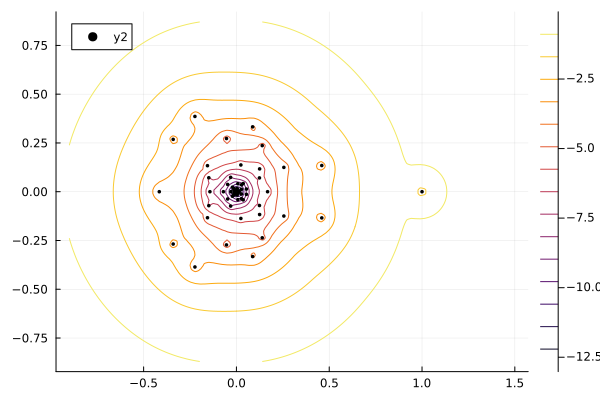

In [46]:
spectralportrait(Pfloat)

In [31]:
N(x::Interval; γ = 0.0) = x-(Btheta(Interval(mid(x)))-exp(2*pi*im*γ))/real(Bthetaprime(x))

N (generic function with 2 methods)

In [32]:
function Newton(t::Interval; γ = 0.0)

    der = Bthetaprime(t)

    @info der

    der_real = real(der)
    der_imag = imag(der)

    func = :real

    if inf(abs(der_real))>inf(abs(der_imag))
        func = :real
    else
        func = :imag
    end

    @info func, der_real, der_imag

    mt = mid(t)


    if func == :real 
        return mt-real(Btheta(Interval(t))-1.0)/der_real ∩ t
    elseif func == :imag
        return mt-imag(Btheta(Interval(t)))/der_imag ∩ t
    end
end

Newton (generic function with 1 method)

In [33]:
t = Newton(a)

@info a, t

┌ Info: [-1.90366e-07, 1.90366e-07] + [6.88557, 6.88558]im
└ @ Main /home/isaia/Dropbox/Lavoro/Collaborators/Blumenthal-Nisoli-Taylor-Crush/DraftPseudospectra/current/Julia_notebooks/Blaschke.ipynb:5
┌ Info: (:imag, [-1.90366e-07, 1.90366e-07], [6.88557, 6.88558])
└ @ Main /home/isaia/Dropbox/Lavoro/Collaborators/Blumenthal-Nisoli-Taylor-Crush/DraftPseudospectra/current/Julia_notebooks/Blaschke.ipynb:18


┌ Info: ([0.859787, 0.859788], ∅)
└ @ Main /home/isaia/Dropbox/Lavoro/Collaborators/Blumenthal-Nisoli-Taylor-Crush/DraftPseudospectra/current/Julia_notebooks/Blaschke.ipynb:3


In [34]:
t = Newton(t)

┌ Info: [-∞, ∞] + [-∞, ∞]im
└ @ Main /home/isaia/Dropbox/Lavoro/Collaborators/Blumenthal-Nisoli-Taylor-Crush/DraftPseudospectra/current/Julia_notebooks/Blaschke.ipynb:5
┌ Info: (:imag, [-∞, ∞], [-∞, ∞])
└ @ Main /home/isaia/Dropbox/Lavoro/Collaborators/Blumenthal-Nisoli-Taylor-Crush/DraftPseudospectra/current/Julia_notebooks/Blaschke.ipynb:18


∅

In [35]:
Btheta(t)

[-∞, ∞] + [-∞, ∞]im